In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay
import seaborn as sns
import matplotlib.pyplot as plt

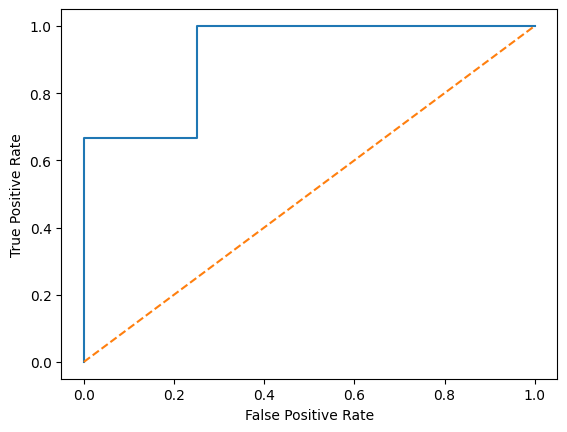

In [ ]:
y_pred = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95]
y_true = [0, 0, 0, 1, 1, 0, 1, 1, 1, 1]

fpr, tpr, thresholds = roc_curve(y_true, y_pred)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
X, y = make_classification(n_samples=1000, n_features=10, n_informative=8, n_redundant=0, n_classes=2, random_state=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression(random_state=1)
model.fit(X_train, y_train)


LogisticRegression(random_state=1)

In [ ]:
y_proba = model.predict_proba(X_test)[:,1]
# y_test = model.predict(X_test)
auc_roc = roc_auc_score(y_test, y_proba)
print('AUC-ROC score:', auc_roc)


AUC-ROC score: 0.8726490596238495


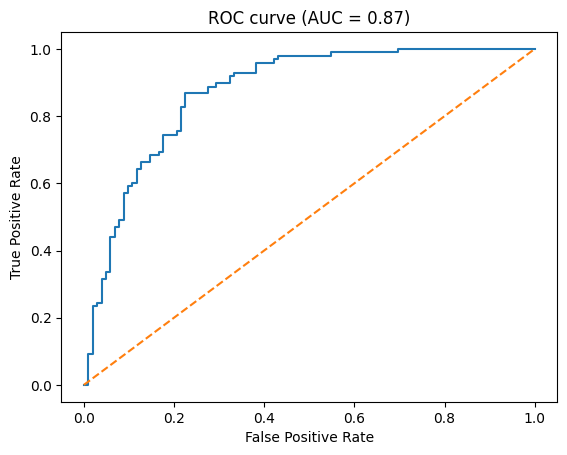

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve (AUC = {:.2f})'.format(auc_roc))
plt.show()


## Extreme values of ROC-AUC

### Senario 1

In [ ]:
# Set random seed for reproducibility
np.random.seed(12)

# Define parameters for uniform distributions
min_0, max_0 = 0.0, 0.49 # range for class 0 probabilities
min_1, max_1 = 0.51, 1.0 # range for class 1 probabilities
n_samples = 1000 # number of samples to generate

y_pred_0 = np.random.uniform(min_0, max_0, size=(n_samples,))
y_pred_1 = np.random.uniform(min_1, max_1, size=(n_samples,))

# Concatenate the probabilities for both classes
y_pred = np.concatenate((y_pred_0, y_pred_1))

# Create the true labels based on the probability threshold of 0.5
y_true = np.concatenate((np.zeros(n_samples), np.ones(n_samples)))


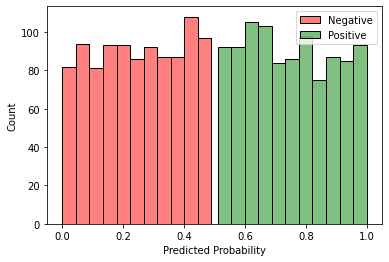

In [ ]:
# visualise distribution plot of predictions
sns.histplot(y_pred[y_true==0], color='r', alpha=0.5, label='Negative')
sns.histplot(y_pred[y_true==1], color='g', alpha=0.5, label='Positive')
plt.legend()
plt.xlabel('Predicted Probability')
plt.ylabel('Count')
plt.show()

In [ ]:
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

auc_roc = roc_auc_score(y_true, y_pred)
print('AUC-ROC score:', auc_roc)

AUC-ROC score: 1.0


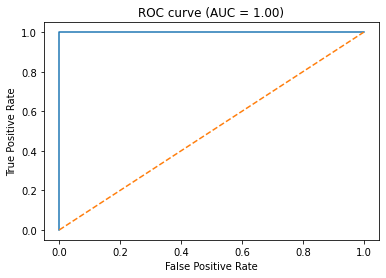

In [ ]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve (AUC = {:.2f})'.format(auc_roc))
plt.show()

### Senario 3

In [ ]:
# generate predictions for negative instances
y_pred_0 = np.random.uniform(0, 1, size=(n_samples,))

# generate predictions for positive instances
y_pred_1 = y_pred_0

# Concatenate the probabilities for both classes
y_pred = np.concatenate((y_pred_0, y_pred_1))

# Create the true labels based on the probability threshold of 0.5
y_true = np.concatenate((np.zeros(n_samples), np.ones(n_samples)))

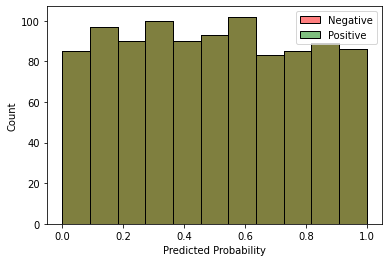

In [ ]:
sns.histplot(y_pred[y_true==0], color='r', alpha=0.5, label='Negative')
sns.histplot(y_pred[y_true==1], color='g', alpha=0.5, label='Positive')
plt.legend()
plt.xlabel('Predicted Probability')
plt.ylabel('Count')
plt.show()

In [ ]:
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

auc_roc = roc_auc_score(y_true, y_pred)
print('AUC-ROC score:', auc_roc)
# the result is not exactly 0.5 due to the floating precision in python

AUC-ROC score: 0.49999999999999994


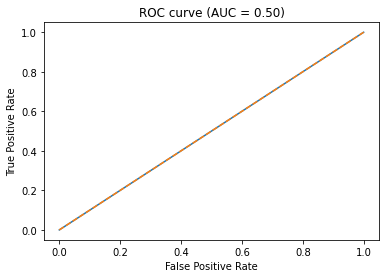

In [ ]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve (AUC = {:.2f})'.format(auc_roc))
plt.show()